# Diagrama de Persistencia

Sea $K$ un complejo simplicial y $f: K \longrightarrow \mathbb{R}$ monótona, no decreciente al considerear cadenas crecientes de caras del complejo simplicial, es decir:
$$f(\sigma)\leq f(\tau)$$
si $\sigma$ es cara de $\tau$.

Los conjuntos de nivel $K(a)=f^{-1}\left(-\infty,a\right]$ son subcomplehos de $K$ para todo $a\in\mathbb{R}$.

Consideremos $a_0=-\infty$ y $a_1<a_2<\cdots <a_n$ son los valores de la función de los simplices en $K$ y denotemos por $K_i = K(a_i)$. Entonces la colección:

$$\emptyset = K_0 \subseteq K_1 \subseteq \cdots \subseteq K_n = K$$

es a lo que llamamos una _filtración_.

Para cada $i\leq j$ tenemos una inclusión de $K_i$ a $K_j$ y por lo tanto un morfismo inducido:

$$f_{p}^{i,j}: H_{p}(K_i)\longrightarrow H_{p}(K_j)$$

para cada $p$.

Entonces, la filtración corresponde a una sucesión de grupos de homología con sus homomorfismos:

$$0= H_{p}(K_0)\longrightarrow H_{p}(K_1)\longrightarrow \cdots \longrightarrow H_{p}(K_n) = H_{p}(K)$$

para cada dimensión $p$.

__Def.__ El _p-ésimo grupo de homología persistente_ es la imagen del homomorfismo inducido por la inclusión 
$$H_{p}^{i,j}=\text{im} f_{p}^{i,j}$$

para $0\leq i\leq j\leq n$. Los correspondientes _p-ésimos números de Betti persistentes_ son las dimensiones $\beta_{p}^{i,j}=\text{dime}H_{p} ^{i,j}$ de los espacios vectoriales $H_{p}^{i,j}$.

Si $\gamma$ es una clase en $H_{p}(K_i)$ decimos que _nace_ en $K_i$ si $\gamma \notin H_{p}^{i-1,i}$. Además, si $\gamma$ nace en $K_i$, entonces decimos que _muere_ al entrar a $K_j$ si se conecta a una clase más vieja conforme viajamos de $K_{j-1}$ a $K_j$, es decir si 

$$f_{p}^{i,j-1}(\gamma)\notin H_{p}^{i-1,j-1}$$ 

pero 

$$f_{p}^{i,j}(\gamma)\notin H_{p}^{i-1,j}.$$ 

Si $\gamma$ _nace_ en $K_i$ y _muere_ al entrar a $K_j$, entonce a la diferencia entre los valores de la función le llamaremos la _persistencia_ de la clase $\gamma$, $\text{pers}(\gamma)=a_{j}-a_i$.

Si $\gamma$ _nace_ en $K_i$ y nunca muere entonces hacemos su persistencia igual a $\infty$.

La colección de números de Betti persistentes se representa por puntos en un espacio de 2-dimensiones. Algunos pueden tener una coordenada igual a infinito y otros pueden ser los mismos. Entonces pensamos en ellos como un multiconjunto de puntos en $\bar{\mathbb{R}}^{2}= (\mathbb{R}\cup {\pm \infty} )^{2}$ .

Sea $\mu_{p}^{i,j}$ el número de clases de $p-$dim independientes que _nacen_ en $K_i$ y _mueren_ entrando a $K-j$:

$$\mu_{p}^{i,j} = (\beta_{p}^{i,j-1}- \beta_{p}^{i,j}) - (\beta_{p}^{i-1,j-1} - \beta_{p}^{i-1,j})$$

para todo $i<j$ y para todo $p$.

 - $\beta_{p}^{i,j-1}- \beta_{p}^{i,j}:$ Cuenta las clases que _nacen_ en o antes de $K_i$ y que mueren al entrar a $K_j$.
 
 - $\beta_{p}^{i-1,j-1} - \beta_{p}^{i-1,j}:$ Cuenta las clases que _nacen_ en o antes de $K_{i-1}$ y que mueren al entrar a $K_j$.
 
 
 Al dibujar cada punto $(a_i,a_j)$ con sus multiplicidades $\mu_{p}^{i,j}$ obtenemos el _p-ésimo diagrama de persistencia_ de la filtración y lo denotamos por $Dgm_{p}(f)$.
 
 $\beta_{p}^{k,l}$ es el número de puntos en $Dgm_{p}(f)$ en el cuadrante superior izquierdo con esquina $(a_k,a_l)$. Una clase que nace en $K_i$ y muere al entrar a $K_j$ se cuenta si y sólo si $a_i < a_k$ y $a_j > a_l$.
 
 
 __LEMA FUNDAMENTAL DE LA HOMOLOGÍA PERSISTENTE.__ Sea $\emptyset = K_0 \subseteq K_1 \subseteq \cdots \subseteq K_n = K$ una filtración. Para cada par de índices $0\leq k\leq l \leq n$ y cada dimensión $p$, el p-ésimo número de Betti es 
 
 $$\beta_{p}^{k,l} = \sum_{i\leq k} \sum_{j>l} \mu_{p}^{i,j} $$


<img src="images/persistencia.jpg" alt="Drawing" style="width: 200px;"/>

[Clases](https://github.com/HaydeePeruyero/CursoA_Aplicaciones_TDA/blob/main/practicas/DiagPersistencia/images/persitencia.jpg)

## Ejemplo. 

La primera parte del ejemplo será en R y la segunda en Python.

Vamos a crear nuestros datos:


[Datos](https://raw.githubusercontent.com/HaydeePeruyero/CursoA_Aplicaciones_TDA/main/practicas/DiagPersistencia/images/a1.svg)

In [ ]:
# R
# Instalar las librerias ripserr y ggtda
# https://github.com/tdaverse/tdaverse

library(ripserr)
library(ggtda)

In [ ]:
# Función para crear los datos
calcular_coordenadas <- function(num_lados, radio, centro_x, centro_y) {
  angulos <- seq(0, 2*pi, length.out = num_lados+1)[-1]
  coordenadas_x <- centro_x + radio * cos(angulos)
  coordenadas_y <- centro_y + radio * sin(angulos)
  
  return(data.frame(x = coordenadas_x, y = coordenadas_y))
}


In [ ]:
#Círculo 1
circ1 <- calcular_coordenadas(8, 1, 0, 0)

#Círculo 2
circ2 <- calcular_coordenadas(8, 1, 4, 0)

#Círculo 3
circ3 <- calcular_coordenadas(6, 1, 9, 0)

#Círculo 4
circ4 <- calcular_coordenadas(12, 1, -5, 0)

#Círculo 5
# Calcular el radio a partir de la longitud del lado
num_lados <- 20
longitud_lado <- 1
radio <- (longitud_lado / 2) / sin(pi / num_lados)
circ5 <- calcular_coordenadas(num_lados, radio, 0, 10)

#Círculo 6
num_lados <- 20
longitud_lado <- 2
radio <- (longitud_lado / 2) / sin(pi / num_lados)
circ6 <- calcular_coordenadas(num_lados, radio, 30, 10)

# Creamos un solo dataframe con todas las coordenadas

datos <- rbind(circ1,circ2, circ3, circ4, circ5,circ6) 

In [ ]:
#Si queremos guardar la base de datos
write.csv(datos, "~/R_sites/datos.csv")

In [ ]:
# Definimos el radio de las circunferencias
eps <- 0.05
prox = 0.1 +eps

In [ ]:
# Crear puntos con los círculos de radio dado

p_d <- ggplot(datos, aes(x = x, y = y)) +
  theme_bw() +
  coord_fixed() +
  stat_disk(radius = prox, fill = "blue") +
  geom_point()+
  ggtitle("Paso de la filtración a1")

p_d

In [ ]:
# Crear complejo simplicial al radio dato
p_sc <- ggplot(datos, aes(x = x, y = y)) +
  theme_bw() +
  coord_fixed() +
  stat_vietoris2(diameter = 2*prox, fill = "darkgoldenrod") +
  stat_vietoris1(diameter = 2*prox, alpha = .25) +
  stat_vietoris0()+
  ggtitle("a7")

p_sc

In [ ]:
# Combinar los plots
plot <- gridExtra::grid.arrange(
  p_d, p_sc,
  layout_matrix = matrix(c(1, 2), nrow = 2)
)

In [ ]:
# Si queremos guardarlo
ggsave("~/R_sites/a7.svg", plot = plot , width = 10, height = 15, units = "in", dpi = 750)

In [ ]:
 ## Persistencia

ph <- as.data.frame(ripserr::vietoris_rips(as.matrix(datos), max_dim = 2))

ph <- transform(ph, dim = as.factor(dimension))

print(head(ph, n = 12))

In [ ]:
# Visualizar el diagrama de persistencia indicando los pasos de la filtración

p_bc <- ggplot(ph,
               aes(start = birth, end = death, colour = dim)) +
  theme_barcode() +
  geom_barcode(size = 1) +
  labs(x = "Diameter", y = "Homological features") +
  geom_vline(xintercept = prox, color = "darkgoldenrod", linetype = "dashed")
p_bc


In [ ]:
max_prox <- max(ph$death)

In [ ]:
#Código de barras

p_pd <- ggplot(ph) +
  theme_persist() +
  coord_fixed() +
  stat_persistence(aes(start = birth, end = death, colour = dim, shape = dim)) +
  geom_abline() +
  labs(x = "Birth", y = "Death") +
  lims(x = c(0, max_prox), y = c(0, max_prox)) +
  geom_fundamental_box(t = prox,
                       color = "darkgoldenrod", fill = "darkgoldenrod",
                                              linetype = "dashed")

p_pd

In [ ]:
# combinamos los plots
gridExtra::grid.arrange(
  p_bc, p_pd,
  layout_matrix = matrix(c(1, 2), nrow = 1)
)

# Diagrama de persistencia en Python

In [57]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from matplotlib import cm
import gudhi
import time
import os  

In [58]:
# Cargamos nuestros datos
url = "https://raw.githubusercontent.com/HaydeePeruyero/CursoA_Aplicaciones_TDA/main/practicas/DiagPersistencia/datos.csv"
df = pd.read_csv(url, header=0)
#df = pd.read_csv("datos3.csv", header=0)

In [82]:
df

,Unnamed: 0,x,y
0,1,1.000000,0.000000
1,2,0.707107,0.707107
2,3,0.000000,1.000000
3,4,-0.707107,0.707107
4,5,-1.000000,0.000000
...,...,...,...
69,70,30.618034,8.097887
70,71,31.175571,8.381966
71,72,31.618034,8.824429
72,73,31.902113,9.381966


In [83]:
# Accede a las coordenadas y conviértelas a un array NumPy
coordinates = df[['x', 'y']].values

# Calcula la matriz de distancias euclidianas
distances = distance.cdist(coordinates, coordinates, 'euclidean')

# Convierte la matriz de distancias a un DataFrame
df_distances = pd.DataFrame(distances, index=df.index, columns=df.index)

In [84]:
df_distances

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.000000,0.765367,1.414214,1.847759,2.000000,1.847759,1.414214,0.765367,4.000000,3.773942,...,28.676066,28.768779,29.059529,29.514603,30.083218,30.705109,31.318084,31.864315,32.294920,32.572995
1,0.765367,0.000000,0.765367,1.414214,1.847759,2.000000,1.847759,1.414214,4.350739,4.000000,...,28.731655,28.840748,29.145965,29.612011,30.187081,30.810505,31.420228,31.958979,32.378721,32.643576
2,1.414214,0.765367,0.000000,0.765367,1.414214,1.847759,2.000000,1.847759,5.099020,4.716210,...,29.321470,29.440749,29.754683,30.227139,30.805844,31.429986,32.037628,32.571794,32.984878,33.241540
3,1.847759,1.414214,0.765367,0.000000,0.765367,1.414214,1.847759,2.000000,5.750745,5.414214,...,30.082900,30.200415,30.512540,30.983478,31.561253,32.185215,32.793423,33.328751,33.743361,34.001657
4,2.000000,1.847759,1.414214,0.765367,0.000000,0.765367,1.414214,1.847759,6.000000,5.750745,...,30.573000,30.678502,30.979896,31.442640,32.015621,32.638564,33.249431,33.790630,34.213599,34.481879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,30.705109,30.810505,31.429986,32.185215,32.638564,32.539090,31.941126,31.179985,26.867442,26.944383,...,2.828427,2.351141,1.815962,1.236068,0.625738,0.000000,0.625738,1.236068,1.815962,2.351141
70,31.318084,31.420228,32.037628,32.793423,33.249431,33.152924,32.556681,31.795259,27.484866,27.558720,...,3.236068,2.828427,2.351141,1.815962,1.236068,0.625738,0.000000,0.625738,1.236068,1.815962
71,31.864315,31.958979,32.571794,33.328751,33.790630,33.701111,33.109205,32.347111,28.042651,28.108521,...,3.564026,3.236068,2.828427,2.351141,1.815962,1.236068,0.625738,0.000000,0.625738,1.236068
72,32.294920,32.378721,32.984878,33.743361,34.213599,34.134302,33.548920,32.785939,28.491138,28.545079,...,3.804226,3.564026,3.236068,2.828427,2.351141,1.815962,1.236068,0.625738,0.000000,0.625738


In [85]:
DistanceMatrix = df_distances.to_numpy()
DistanceMatrix

array([[ 0.        ,  0.76536686,  1.41421356, ..., 31.86431486,
        32.29492028, 32.57299495],
       [ 0.76536686,  0.        ,  0.76536686, ..., 31.95897916,
        32.37872137, 32.64357564],
       [ 1.41421356,  0.76536686,  0.        , ..., 32.57179409,
        32.9848779 , 33.24154028],
       ...,
       [31.86431486, 31.95897916, 32.57179409, ...,  0.        ,
         0.62573786,  1.23606798],
       [32.29492028, 32.37872137, 32.9848779 , ...,  0.62573786,
         0.        ,  0.62573786],
       [32.57299495, 32.64357564, 33.24154028, ...,  1.23606798,
         0.62573786,  0.        ]])

In [86]:
max_edge_length = 7
#0.2588190*2+0.05
# Rips complex with the distance matrix
start_time = time.time()
ripsComplex = gudhi.RipsComplex(
    distance_matrix = DistanceMatrix, 
    max_edge_length = max_edge_length
)
print("The Rips complex was created in %s" % (time.time() - start_time) )

The Rips complex was created in 0.0016176700592041016


In [87]:
start_time = time.time()
simplexTree = ripsComplex.create_simplex_tree(
    max_dimension = 3)
print("The filtration of the Rips complex was created in %s" % (time.time() - start_time))

The filtration of the Rips complex was created in 0.003999471664428711


In [88]:
start_time = time.time()
persistence = simplexTree.persistence()  
print("The persistente diagram of the Rips complex was created in %s" % (time.time() - start_time))

The persistente diagram of the Rips complex was created in 0.022721529006958008


In [89]:
result_str = 'Rips complex of dimension ' + repr(simplexTree.dimension())
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplexTree.get_filtration():
    print(tuple(filtered_value))


Rips complex of dimension 3
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([35, 36], 0.3128689300804092)
([40, 41], 0.3128689300804092)
([42, 43], 0.3128689300804152)
(

In [90]:
simplexTree.dimension(), simplexTree.num_vertices(), simplexTree.num_simplices()

(3, 74, 22321)

Bar code diagram was created in 0.07875752449035645


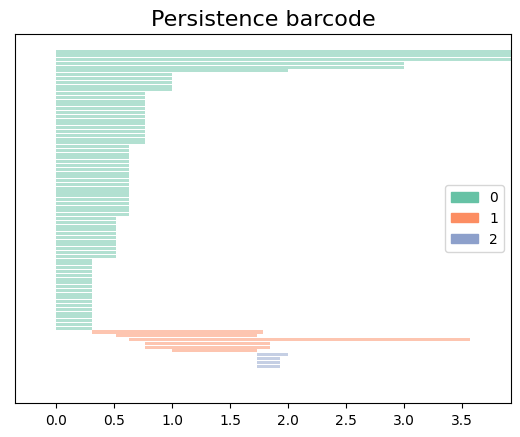

In [91]:
start_time = time.time()
gudhi.plot_persistence_barcode(
    persistence = persistence, 
    alpha = 0.5,
    colormap = cm.Set2.colors
)
print("Bar code diagram was created in %s" % (time.time() - start_time))

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

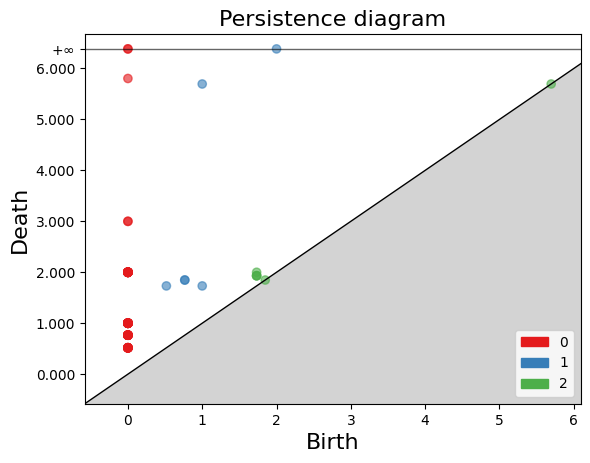

In [69]:
gudhi.plot_persistence_diagram(persistence, legend=True)